In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")

In [43]:
us_sales_data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [44]:
for column in us_sales_data:
    if column not in ['OrderDate', 'ShipDate', 'DeliveryDate']:
        print(column, us_sales_data[column].unique())

OrderNumber ['SO - 000101' 'SO - 000102' 'SO - 000103' ... 'SO - 0008089'
 'SO - 0008090' 'SO - 0008091']
Sales Channel ['In-Store' 'Online' 'Distributor' 'Wholesale']
WarehouseCode ['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']
ProcuredDate ['31/12/17' '10/4/18' '19/7/18' '27/10/18' '4/2/19' '15/5/19' '23/8/19'
 '1/12/19' '10/3/20' '18/6/20' '26/9/20']
CurrencyCode ['USD']
_SalesTeamID [ 6 14 21 28 22 12 10  4 23  8  9  5 25  2  7 24 18 20 13 19 17 26 11 15
 16 27  3  1]
_CustomerID [15 20 16 48 49 21 14  9 33 36 17 32 11 10 30  5 23 46 40 19 22 29 35 42
  2 28 34 26 24 18  3 13  4 25  8 47  6 38  1  7 27 44 12 50 43 37 41 31
 45 39]
_StoreID [259 196 213 107 111 285   6 280 299 261  17 152 317 291 138 354 320  21
 349 134 193 282  20 218 173 110 229 238  97 103 305 303 217 362 335  84
 256 360  90  40 367 249 212  37  38 294 105 109 141 148  59  60 151 262
 120 233  77  69 215  30 169 333  96 289 140 338 232 231 158  36 206 255
 336 307  

In [45]:
us_sales_data = us_sales_data.drop(labels = ['OrderNumber', 'ProcuredDate', 'CurrencyCode'], axis=1)
us_sales_data

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31/5/18,14/6/18,19/6/18,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,31/5/18,22/6/18,2/7/18,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,31/5/18,21/6/18,1/7/18,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,31/5/18,2/6/18,7/6/18,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,31/5/18,16/6/18,26/6/18,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,30/12/20,7/1/21,14/1/21,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,30/12/20,2/1/21,4/1/21,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,30/12/20,23/1/21,26/1/21,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,30/12/20,20/1/21,25/1/21,20,42,112,36,8,0.100,804,"1,072.00"


In [71]:
us_sales_data['DaysToShip'] = (pd.to_datetime(us_sales_data['ShipDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['OrderDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')

In [72]:
us_sales_data['DaysToShip']

0       14.0
1       22.0
2       21.0
3        2.0
4       16.0
        ... 
7986     8.0
7987     3.0
7988    24.0
7989    21.0
7990    14.0
Name: DaysToShip, Length: 7991, dtype: float64

In [76]:
daysToShip = np.array(us_sales_data['DaysToShip'])
daysToShip[daysToShip < 0]

array([], dtype=float64)

In [77]:
us_sales_data['DaysToDeliver'] = (pd.to_datetime(us_sales_data['DeliveryDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['ShipDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')

In [78]:
daysToDeliver = np.array(us_sales_data['DaysToDeliver'])
daysToDeliver[daysToDeliver < 0]

array([], dtype=float64)

In [50]:
for column in us_sales_data:
    print(f"{column} : {us_sales_data[column].isna().sum()}")

Sales Channel : 0
WarehouseCode : 0
OrderDate : 0
ShipDate : 0
DeliveryDate : 0
_SalesTeamID : 0
_CustomerID : 0
_StoreID : 0
_ProductID : 0
Order Quantity : 0
Discount Applied : 0
Unit Cost : 0
Unit Price : 0


In [79]:
us_sales_data = us_sales_data.drop(labels = ['OrderDate', 'ShipDate', 'DeliveryDate'], axis=1)
us_sales_data

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver
0,In-Store,WARE-UHY1004,6,15,259,12,5,0.075,"1,001.18","1,963.10",14.0,5.0
1,Online,WARE-NMK1003,14,20,196,27,3,0.075,"3,348.66","3,939.60",22.0,10.0
2,Distributor,WARE-UHY1004,21,16,213,16,1,0.050,781.22,"1,775.50",21.0,10.0
3,Wholesale,WARE-NMK1003,28,48,107,23,8,0.075,"1,464.69","2,324.90",2.0,5.0
4,Distributor,WARE-NMK1003,22,49,111,26,8,0.100,"1,476.14","1,822.40",16.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,9,41,339,29,1,0.075,121.94,234.5,8.0,7.0
7987,Online,WARE-NMK1003,14,29,202,3,6,0.050,"1,921.56","3,202.60",3.0,2.0
7988,Online,WARE-UHY1004,14,32,241,35,5,0.200,"2,792.76","3,825.70",24.0,3.0
7989,Online,WARE-NMK1003,20,42,112,36,8,0.100,804,"1,072.00",21.0,5.0


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 7991.

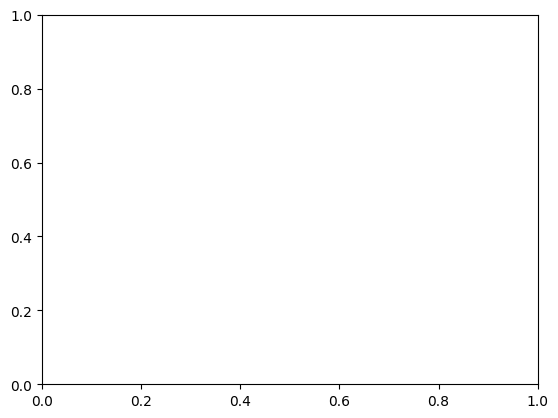

In [82]:
plt.scatter(us_sales_data['DaysToShip'], us_sales_data['DaysToDeliver'], c='blue')
plt.show()